<a href="https://colab.research.google.com/github/ZahibVentura/M-todos-de-Optimizaci-n-/blob/main/Distribuci%C3%B3n_calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
n1,m1 = 8,8
n,m = n1+2,m1+2
matriz = np.zeros((n,m))
Matriz = np.zeros((n1,m1))

In [3]:

N = 10000 #No. iteraciones
lista_prom = []
# Bucle principal
for i in range(1,n-1):
  for j in range(1,m-1):
    suma = 0
    for k in range(N):
      f, l = i,j #Guardar el punto de partida o donde nos encontramos
      while True:
          contador = 0
          # Generar número aleatorio para decidir donde movernos
          n_aleatorio = rd.uniform(0, 1)
          #Movernos de la posicion de donde nos encontramos
          if n_aleatorio <= 0.25 and f > 0:   #avanzar a la izquierda
              f -= 1
          elif 0.25 < n_aleatorio <= 0.5 and l > 0:  #avanzar arriba
              l -= 1
          elif 0.5 < n_aleatorio <= 0.75 and f < m : #avanzar a la derecha
              f += 1
          elif 0.75 < n_aleatorio and l < n: #avanzar abajo
              l += 1

          # Actualizar contador según las condiciones en los bordes
          if l == 0:  # Izquierda
              contador += 100
              break
          elif l == n:  # Derecha
              contador += 60
              break
          elif f == 0:  # Arriba
              contador += 80
              break
          elif f == m :  # Abajo
              contador += 40
              break
      suma = suma + contador
      if i == 1 and j == 8:
        prom = suma/(k+1)
        lista_prom.append(prom)





    # Registrar posición en la matriz
    matriz[i][j] = suma/N


print(matriz)

[[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    89.278 84.198 81.6   80.05  78.7   77.258 76.13  74.05   0.   ]
 [ 0.    92.084 86.604 82.52  79.474 77.37  74.892 72.822 70.118  0.   ]
 [ 0.    92.972 87.07  82.122 78.278 74.938 72.67  69.816 67.352  0.   ]
 [ 0.    92.856 86.24  80.508 76.038 73.008 69.87  67.354 64.814  0.   ]
 [ 0.    91.962 84.492 78.822 73.324 69.832 67.184 64.638 63.15   0.   ]
 [ 0.    90.42  81.834 75.338 70.108 65.95  63.714 61.622 60.412  0.   ]
 [ 0.    87.438 76.992 70.078 64.928 61.418 59.282 57.912 57.248  0.   ]
 [ 0.    82.424 69.372 62.616 58.396 55.422 53.706 53.284 53.292  0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]]


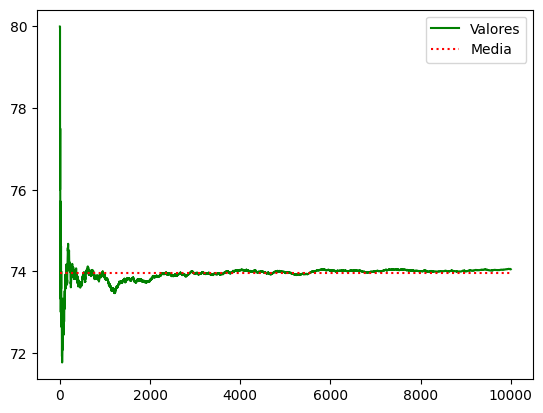

In [4]:
"""media = np.mean(lista_prom)

plt.plot(lista_prom,color = 'green')
plt.hlines(media,color = 'r', linestyles = 'dotted')
plt.show()"""

media = np.mean(lista_prom)
limite = np.std(lista_prom)
#print(media, limite)
# Graficar
plt.plot(lista_prom,color='green', label='Valores')
plt.hlines(media, xmin=0, xmax=len(lista_prom)-1, color='r', linestyle='dotted', label='Media')
#plt.hlines(media+limite, xmin=0, xmax=len(lista_prom)-1, color='k', linestyle='dashed', label='Limite superior')
#plt.hlines(media-limite, xmin=0, xmax=len(lista_prom)-1, color='k', linestyle='dashed', label='Limite inferior')
plt.legend()  # Agrega una leyenda opcional
plt.show()


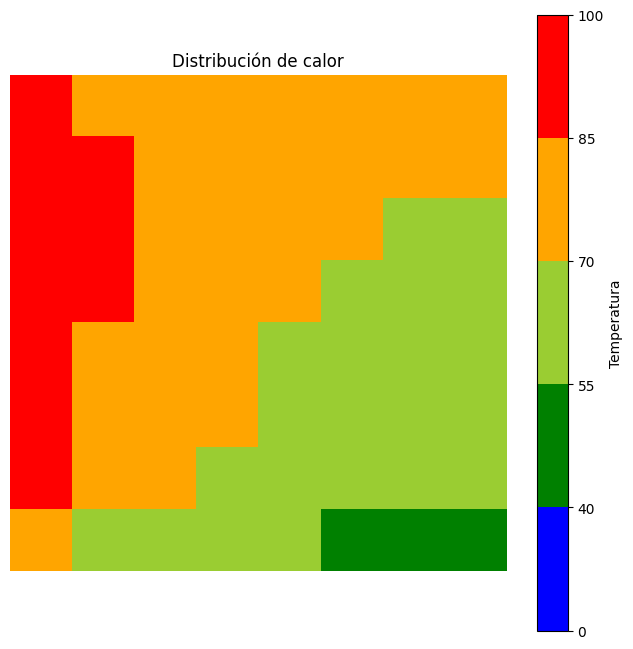

In [5]:


Matriz = matriz[1:-1, 1:-1]

# Configuración del mapa de colores
cmap = mcolors.ListedColormap(['blue','green', 'yellowgreen','orange','red'])
bounds = [0, 40, 55, 70, 85, 100]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Visualización de la matriz con el mapa de calor
plt.figure(figsize=(8, 8))
plt.imshow(Matriz, cmap=cmap, norm=norm)
plt.colorbar(label="Temperatura")
plt.title("Distribución de calor")
plt.axis('off')
plt.show()
